In [839]:
#r "nuget: SkiaSharp, 2.88.3"
#r "nuget: SkiaSharp.NativeAssets.Linux.NoDependencies, 2.88.3"


open SkiaSharp
open System
open System.Runtime.InteropServices


Installed Packages SkiaSharp, 2.88.3 SkiaSharp.NativeAssets.Linux.NoDependencies, 2.88.3

In [840]:
let inline convIterations (x: float) (y: float) max =
    let mutable n = 0
    let mutable zx = x
    let cx = x
    let mutable zy = y
    let cy = y
    while n <= max && (zx * zx) + (zy * zy) < 4 do
        let zyNew = (2. * zx * zy) + cy
        let zxNew = (zx * zx) - (zy * zy) + cx
        zx <- zxNew
        zy <- zyNew
        n <- n + 1
    if n > max then ValueNone else ValueSome n


### Восьмой вариант

In [841]:

let inline createPointMap width height reMin reMax imMax imMin zoom offset =
    let ofX, ofY = offset 
    let deltaRe = (reMax - reMin) / zoom
    let deltaIm = (imMax - imMin) / zoom
    let stepX = deltaRe / (float width)
    let stepY = deltaIm / (float height)
    seq {
        for y in 0 .. height do
            for x in 0 .. width do
                ofX + reMin + (stepX * float x), ofY + imMin + (stepY * float y)
    }
    
let inline convergenceMandelbrotIterations max (x, y) =
    convIterations x y max

let inline paint pallete x =
    match x with
    | ValueNone -> pallete 0
    | ValueSome x -> pallete x

#### Палитры

In [842]:
let colorfulPalette n =
    if n = 0 then SKColors.Black else 
        SKColor(255uy - byte (n * 10),255uy - byte (n * 30 ), byte (n * 10))

let blackAndWhitePalette n =
    if n = 0 then SKColors.Black else SKColors.White

let bluePalette n =
    if n = 0 then SKColors.Black else 
        SKColor(12uy, byte (n * 10), 255uy)
 
let shadesOfGrey n = 
    if n = 0 then SKColors.Black else 
        SKColor(byte (n % 150) * 3uy, byte (n % 150) * 3uy, byte (n % 150) * 3uy)



#### Переменные

In [843]:
let width, height = 800, 600
let reMin, reMax, imMax, imMin = -0.177, -0.038, 0.917, 0.814
//let reMin, reMax, imMax, imMin = -2., 1., 1.5, -1.5
let maxIterations = 250
let zoom = 1.
let offset = 0., 0.


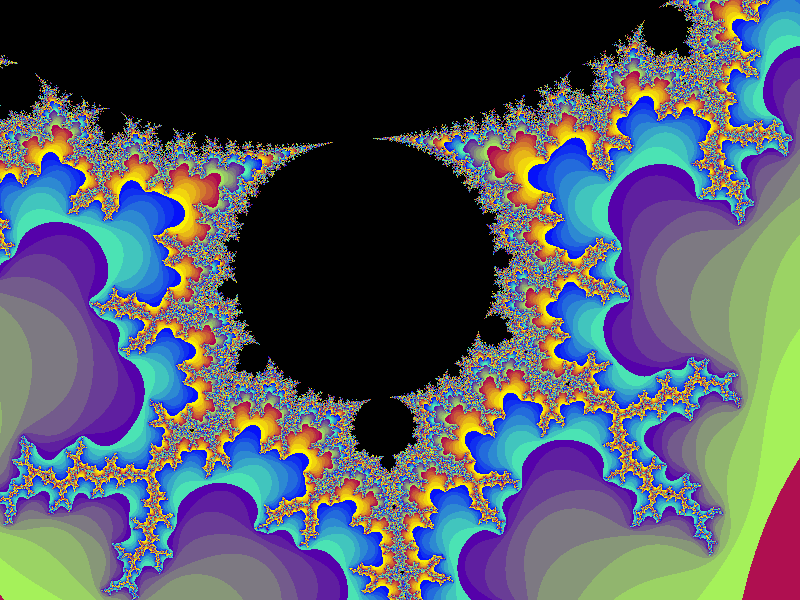

In [844]:
let colors =
    createPointMap (width - 1) (height - 1) reMin reMax imMax imMin zoom offset
    |> Seq.map (convergenceMandelbrotIterations maxIterations)
    |> Seq.map (paint colorfulPalette) // сюда можно подставить свою палитру
    |> Seq.toArray 

let bitmap = SKBitmap (width, height)
bitmap.Pixels <- colors
bitmap.Display()